HARRCASCADE

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = '/home/clive69/.local/lib/python3.6/site-packages/cv2/data/'


face_cascade = cv2.CascadeClassifier(path+'haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier(path+'haarcascade_eye.xml')



In [3]:
img = cv2.imread('image100.jpg')

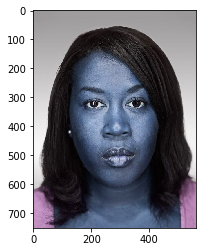

In [4]:
plt.imshow(img)

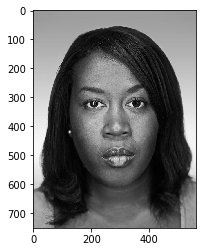

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')

In [6]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    
    
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_img = img[y:y+h,x:x+w] 

    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        
        cv2.rectangle(roi_img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        

In [7]:

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


VIDEO DETECTION

In [3]:
cap = cv2.VideoCapture(0)
while 1:
    
    ret,frame = cap.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    
    faces = face_cascade.detectMultiScale(gray,1.3,2)
    
    
    for (x,y,w,h) in faces:
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
        
        roi_gray = gray[y:y+h,x:x+w]
        roi_img = frame[y:y+h,x:x+w] 

        eyes = eye_cascade.detectMultiScale(roi_gray)
    
        for (ex,ey,ew,eh) in eyes:
        
            cv2.rectangle(roi_img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
    
    cv2.imshow('img',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    
    
cap.release()    
    
cv2.destroyAllWindows()    
    

HOG (HISTORGRAM OF ORIENTED GRADIENTS)

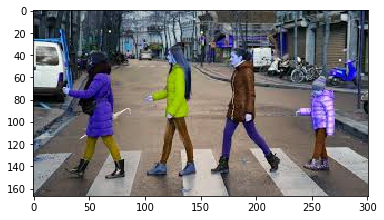

In [30]:
from imutils.object_detection import non_max_suppression
import imutils
ped_img = cv2.imread('ped_3.jpeg')
plt.imshow(ped_img)

In [31]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [61]:
image = imutils.resize(ped_img, width=min(400, ped_img.shape[1]))
orig = image.copy()
 
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
padding=(8, 8), scale=1.02)
 
# draw the original bounding boxes
for (x, y, w, h) in rects:
	cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
 
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
	cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
 

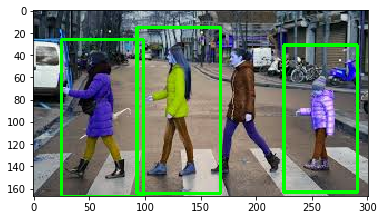

In [62]:
plt.imshow(image)

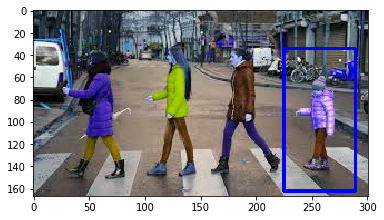

In [43]:
plt.imshow(orig)

In [36]:
cv2.imshow("Before NMS", orig)
cv2.imshow("After NMS", image)
cv2.waitKey(0)

48

<b>A larger scale  size will evaluate less layers in the image pyramid which can make the algorithm faster to run. However, having too large of a scale (i.e., less layers in the image pyramid) can lead to pedestrians not being detected. Similarly, having too small of a scale  size dramatically increases the number of image pyramid layers that need to be evaluated. Not only can this be computationally wasteful, it can also dramatically increase the number of false-positives detected by the pedestrian detector. That said, the scale  is one of the most important parameters to tune when performing pedestrian detection. I’ll perform a more thorough review of each of the parameters to detectMultiScale  in a future blog post.</b>